# Predicting Default likelihood of bank clients
Hello!
This is code made by Dan and Jan on Default prediction using Logistic Regression and Random Forrest. We made sure to prrof read and double check this code to run on difference device from our own.
However! If you run into any issues, please do not hesitate to contact us on our school emails:
- Dan: mald07@vse.cz
- Jan: hybj00@vse.cz

Happy reviewing :) 

### **Code overview**
This report is broken to four sections


1.   Testing Age as single variable predicting likelihood of clients default
2.   Testing All variable for significance to model clients default likelyhood
3.   Composing model out of significant variables
4.   Random forrest model





**1. Testing Age as single variable predicting likelihood of clients default**
- intuitively we suppose that age will be major driver of the clients default likelihood
- however age as mere quantitative variable can be misleading
- we focus on default ratio per given age group
- age groups with default ratio higher than 50% are the flagged as risky age group
- risky age group flag serves as factor variable (dummy variable) rather than mere quantitative variable


**2. Testing All variable for significance in clients default likelihood model**
- in second module we attempt to identify significant variables
- model includiing all variable is done and additional significance testing is used to identify redundant variables

**3. Composing model out of significant variables**
- once relevant variable are identified a model constructed
- model is compared to previous models (all variables model and single variable model)


**4. Random Forrest model**
- Finally random forrest model is composed and analysed
- Logistic Regression and Random forrest models are compared

# **0. Loading, Checking and Cleaning data**

In [36]:
from pandas.io.parsers.readers import read_csv
import pandas as pd
data_raw = pd.read_csv('data.csv', sep = ';')
print(data_raw)

     Loan term  Loan Amount  Year of application  Year of birth    City  \
0           36       2384.0                 2012           1979  Prague   
1           12       3499.0                 2015           1986    Brno   
2            9        918.0                 2014           1984  Prague   
3            9       1501.0                 2010           1976    Brno   
4           12       1555.0                 2017           1962    Brno   
..         ...          ...                  ...            ...     ...   
995         12       3059.0                 2019           1958  Prague   
996         30       7596.0                 2020           1957  Prague   
997         30       4811.0                 2019           1995  Prague   
998          9       1199.0                 2010           2043    Brno   
999         36       2862.0                 2010           1980  Prague   

     Gender   Education  DEFAULT  
0    Female     Primary        1  
1    Female     Primary      

In [37]:
import numpy as np

data_raw.head()

,Loan term,Loan Amount,Year of application,Year of birth,City,Gender,Education,DEFAULT
0,36,2384.0,2012,1979,Prague,Female,Primary,1
1,12,3499.0,2015,1986,Brno,Female,Primary,0
2,9,918.0,2014,1984,Prague,Female,Primary,1
3,9,1501.0,2010,1976,Brno,Female,Primary,0
4,12,1555.0,2017,1962,Brno,Female,Secondary,0


**NA analysis**

In [38]:
data_raw.isna().sum()

Loan term               0
Loan Amount             4
Year of application     0
Year of birth           0
City                   52
Gender                  0
Education               0
DEFAULT                 0
dtype: int64

In [39]:
data_raw[data_raw.isna().any(axis=1)]

,Loan term,Loan Amount,Year of application,Year of birth,City,Gender,Education,DEFAULT
7,24,5943.0,2020,1976,NaN,Male,Primary,0
11,42,NaN,2018,1988,Brno,Female,Primary,1
19,48,NaN,2010,1960,Brno,Female,Secondary,0
32,6,NaN,2016,1984,Prague,Female,Primary,1
35,30,1908.0,2020,1954,NaN,Male,Primary,1
51,24,3349.0,2019,1989,NaN,Female,Primary,0
58,36,9572.0,2016,1988,NaN,Female,Primary,0
59,9,1366.0,2015,1993,NaN,Female,Secondary,0
60,9,NaN,2010,1976,Prague,Female,Secondary,0
75,24,1333.0,2012,1969,NaN,Female,Secondary,1


**NA removal**

In [40]:
data = data_raw.dropna()
data.isna().sum()

Loan term              0
Loan Amount            0
Year of application    0
Year of birth          0
City                   0
Gender                 0
Education              0
DEFAULT                0
dtype: int64

**Population Check**

In [41]:
data.dtypes

Loan term                int64
Loan Amount            float64
Year of application      int64
Year of birth            int64
City                    object
Gender                  object
Education               object
DEFAULT                  int64
dtype: object

In [42]:
pd.pivot_table(data, index = 'DEFAULT', aggfunc='count')

,City,Education,Gender,Loan Amount,Loan term,Year of application,Year of birth
DEFAULT,,,,,,,
0,593,593,593,593,593,593,593
1,351,351,351,351,351,351,351


**Investigation of problematic values in Year of Birth**

array([[<AxesSubplot:title={'center':'Year of birth'}>]], dtype=object)

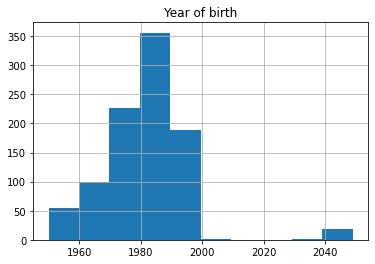

In [43]:
data.hist(column = 'Year of birth')

In [44]:
data.loc[data['Year of birth'] > 2020]

,Loan term,Loan Amount,Year of application,Year of birth,City,Gender,Education,DEFAULT
5,12,766.0,2013,2047,Prague,Female,University,0
178,24,4526.0,2015,2041,Brno,Male,University,1
195,6,1299.0,2010,2036,Prague,Female,University,0
295,10,7308.0,2010,2040,Prague,Male,Primary,1
344,21,571.0,2012,2047,Prague,Male,Secondary,0
346,6,1374.0,2015,2040,Prague,Male,Primary,1
352,24,6615.0,2019,2044,Brno,Female,Secondary,1
382,6,1169.0,2012,2045,Prague,Female,University,0
384,42,3394.0,2010,2045,Brno,Male,Secondary,0
437,18,2600.0,2011,2046,Prague,Male,Primary,1


**Fix of Problematic values**

In [45]:
data['Year of birth'] = np.where(data['Year of birth'] > 2020, data['Year of birth']-100, data['Year of birth'])
data.loc[data['Year of birth'] > 2020]

,Loan term,Loan Amount,Year of application,Year of birth,City,Gender,Education,DEFAULT


array([[<AxesSubplot:title={'center':'Year of birth'}>]], dtype=object)

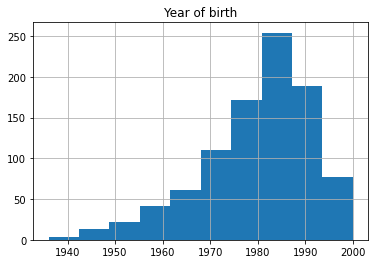

In [46]:
data.hist(column = 'Year of birth')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

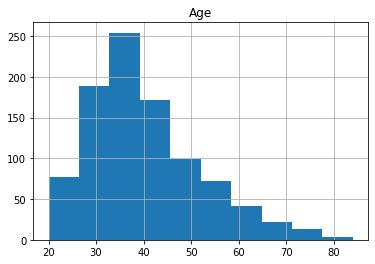

In [47]:
data['Age'] = 2020 - data['Year of birth']
data.hist(column = 'Age')

**Normality test of Age Distribution**

# **1. [LOGIT] Age as single variable**

In [48]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [49]:
from scipy import stats

In [50]:
stats.shapiro(data['Age'])

ShapiroResult(statistic=0.9451223015785217, pvalue=3.1634765656830057e-18)

**distribution of age seems to follow deviate from normal distribution**

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

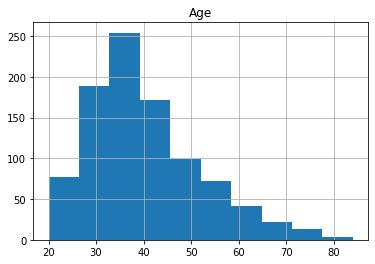

In [51]:
data.hist(column="Age")

## 1.1 [SINGLE VARIABLE] Model using Age as quantitative variable

### **Logistic Regression of Quantitative Age and Default**

In [52]:
from sklearn import preprocessing

In [53]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm

In [54]:
y = data['DEFAULT']
x = data['Age']

y_train,y_test,x_train,x_test = train_test_split(y,x,test_size=0.25, random_state=0)
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [55]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[159,   0],
       [ 77,   0]])

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.673728813559322


Testing Accuracy of Logistic regression model
 - accuracy is at 67%
 - model accuracy could be greatly increased

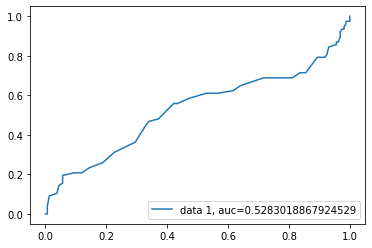

In [57]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Area Under Curve (AUC) is at 52.8%
 - AUC is barely breaking even signifying that model is able to estimate roughly half of the defaults
 - this model is not fit for predcitions since we could flip a coin do decide whether the result will be good or not

In [58]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.664439
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  708
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            0
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                0.004422
Time:                        18:44:07   Log-Likelihood:                -470.42
converged:                       True   LL-Null:                       -472.51
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0118      0.002     -6.249      0.000      -0.015      -0.008


According to wald test age is sufficient predictor of the default
 - however as we observed earlier model has very bad results from AUC and accuracy tests

## 1.2a Preparing data for Age group default ratio model  

Histogram of defaults per age

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

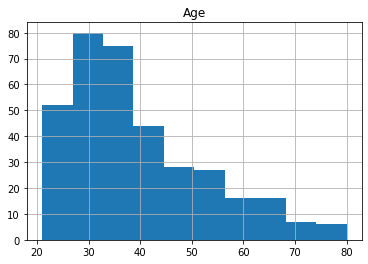

In [59]:
data[data['DEFAULT'] == 1].hist(column='Age')

Creating Dataframe for Default likelihood of age groups

In [60]:
dtypes = np.dtype(
    [
        ("Age Group", int),
        ('DEFAULTS', int),
        ('REPAYMENTS', int),
        ("Likelihood", float)
    ]
)
age_group_default_likelihood = pd.DataFrame(np.empty(0, dtype=dtypes))
age_group_default_likelihood['Age Group'] = range(20,91)
age_group_default_likelihood.dtypes

Age Group       int64
DEFAULTS      float64
REPAYMENTS    float64
Likelihood    float64
dtype: object

Filling Age Group dataframe

In [61]:
age_group_default_likelihood.loc[2]

Age Group     22.0
DEFAULTS       NaN
REPAYMENTS     NaN
Likelihood     NaN
Name: 2, dtype: float64

In [62]:
pd.options.mode.chained_assignment = None
for i in range(0, len(data.index)):
  age_group_default_likelihood['DEFAULTS'].loc[i] = data[(data['Age'] == (i+data['Age'].min())) & (data['DEFAULT'] == 1)]['DEFAULT'].count()
  age_group_default_likelihood['REPAYMENTS'].loc[i] = data[(data['Age'] == (i+data['Age'].min())) & (data['DEFAULT'] == 0)]['DEFAULT'].count()


Calculating Default Ratio for Age groups

In [63]:
age_group_default_likelihood['Likelihood'] = age_group_default_likelihood['DEFAULTS'] / (age_group_default_likelihood['DEFAULTS'] + age_group_default_likelihood['REPAYMENTS'])
age_group_default_likelihood['Likelihood'] = age_group_default_likelihood['Likelihood'].fillna(0)
age_group_default_likelihood

,Age Group,DEFAULTS,REPAYMENTS,Likelihood
0,20,0.0,1.0,0.000000
1,21,4.0,1.0,0.800000
2,22,9.0,2.0,0.818182
3,23,7.0,3.0,0.700000
4,24,10.0,3.0,0.769231
...,...,...,...,...
66,86,0.0,0.0,0.000000
67,87,0.0,0.0,0.000000
68,88,0.0,0.0,0.000000
69,89,0.0,0.0,0.000000


Plotting Default ratio per age group

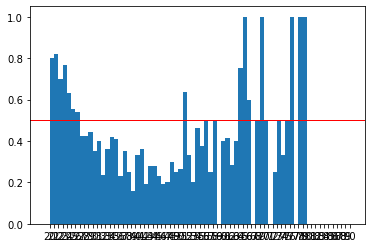

In [64]:
import matplotlib.pyplot as plt

pos = np.arange(len(age_group_default_likelihood['Age Group']))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(age_group_default_likelihood['Age Group'])

plt.bar(pos, age_group_default_likelihood['Likelihood'], width)
plt.axhline(y=0.5,linewidth=1, color='r')
plt.show()

Default ratio shows quadratic trend
 - this implies that Age is significant factor among young and old clients
 - even though Age is not significant quantitative variable, it could be significant factor variable in age groups where deafault ratio reaches above 50%
 - as a factor variable, clients under age of 30, or above age of 50, are risk clients because their age groups are having default ratio greater than 50%


In [65]:
age_group_default_likelihood[age_group_default_likelihood['Likelihood'] >= 0.50].sort_values(['Age Group', 'Likelihood'])

,Age Group,DEFAULTS,REPAYMENTS,Likelihood
1,21,4.0,1.0,0.800000
2,22,9.0,2.0,0.818182
3,23,7.0,3.0,0.700000
4,24,10.0,3.0,0.769231
5,25,12.0,7.0,0.631579
6,26,10.0,8.0,0.555556
7,27,14.0,12.0,0.538462
32,52,7.0,4.0,0.636364
37,57,5.0,5.0,0.500000
39,59,2.0,2.0,0.500000


## 1.2b [SINGLE VARIABLE] Model using Age as Factor variable

In [66]:
data['Risk_Age_Float'] = np.where(np.logical_or(data['Age'] < 30, data['Age'] > 50), 1, 0)

In [67]:
data

,Loan term,Loan Amount,Year of application,Year of birth,City,Gender,Education,DEFAULT,Age,Risk_Age_Float
0,36,2384.0,2012,1979,Prague,Female,Primary,1,41,0
1,12,3499.0,2015,1986,Brno,Female,Primary,0,34,0
2,9,918.0,2014,1984,Prague,Female,Primary,1,36,0
3,9,1501.0,2010,1976,Brno,Female,Primary,0,44,0
4,12,1555.0,2017,1962,Brno,Female,Secondary,0,58,1
...,...,...,...,...,...,...,...,...,...,...
995,12,3059.0,2019,1958,Prague,Female,University,0,62,1
996,30,7596.0,2020,1957,Prague,Female,University,1,63,1
997,30,4811.0,2019,1995,Prague,Female,Primary,1,25,1
998,9,1199.0,2010,1943,Brno,Male,Secondary,1,77,1


### Logistic Regression of Factor Age and Default 

In [68]:
y = data['DEFAULT']
x = data['Risk_Age_Float']

y_train,y_test,x_train,x_test = train_test_split(y,x,test_size=0.25, random_state=0)
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [69]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[159,   0],
       [ 77,   0]])

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.673728813559322


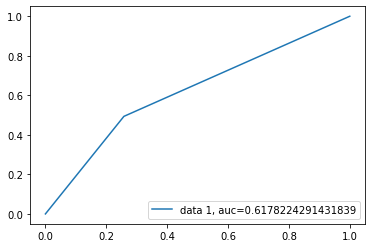

In [71]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Area Under Curve (AUC) is at 61.78%
 - AUC has increased noticeably
 - using age as factor variable significantly improves it's use in model

In [72]:
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.693102
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  708
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            0
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                -0.03853
Time:                        18:44:09   Log-Likelihood:                -490.72
converged:                       True   LL-Null:                       -472.51
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0323      0.127     -0.254      0.800      -0.281       0.217


# **2. [LOGIT] All variables**

- in this secion we will attemp to compose model with all of the available variables
- goal of this section is to identify significant variable to later use in final lighter model
- using all the available variables also serves as benchmark to information generated by models with less variables

## 2.1 [ALL VARIABLES] Quantitative Testing - Age as quantitative variable





- in this model we attempt to use Age as quantitative variable
- as shown in previous section Age as quantitative variable carries less information to the model than Age as factor variable
- however in order to confirm this thesis we will contruct logit model including all variables both with Age as quantitative variable and factor variable

In [73]:
data['City_Float'] = np.where(data['City'] == 'Prague', 1, 2)
data['Gender_Float'] = np.where(data['Gender'] == 'Male', 1, 2)
data['Education_Float'] = np.where(data['Education'] == 'Primary', 1, np.where(data['Education'] == 'Secondary', 2, 3))
data['City_Float'] = pd.to_numeric(data['City_Float'], downcast="float")
data['Gender_Float'] = pd.to_numeric(data['Gender_Float'], downcast="float")
data['Education_Float'] = pd.to_numeric(data['Education_Float'], downcast="float")

In [74]:
feature_vars = ['Loan term', 'Loan Amount', 'Year of application', 'City_Float', 'Gender_Float', 'Education_Float', 'Age']

y = data['DEFAULT']
x = data[feature_vars]
x = np.asmatrix(x)

y_train,y_test,x_train,x_test = train_test_split(y,x,test_size=0.25, random_state=0)
#x_train = x_train.values.reshape(-1,1)
#x_test = x_test.values.reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [75]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[131,  28],
       [ 30,  47]])

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7542372881355932


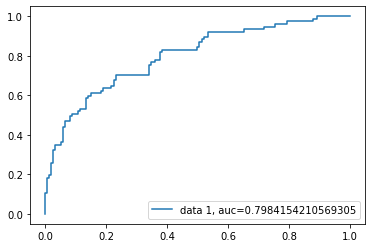

In [77]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Area Under Curve (AUC) is at 79.84% while using Age as quantitative variable
 - AUC has increased noticeably compared to 'Age-only' model
 - using age as quantitative variable together with other variables significantly improves logit model

In [78]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536921
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  708
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                            6
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.1955
Time:                        18:44:10   Log-Likelihood:                -380.14
converged:                       True   LL-Null:                       -472.51
Covariance Type:            nonrobust   LLR p-value:                 3.332e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0094      0.009      1.013      0.311      -0.009       0.027
x2             0.0001   4.08e

**According to wald test, loan term, Year of application, Gender and age are not sufficient predictor of the default**



## 2.2 [DONE] DEV: [ALL VARIABLES] Qualitative Testing - Age as Factor Variable

- this section is dedicated to the logit model using Age as factor variable as defined in section 1.2a
- from section 1.2b we expect this model to outperform a model using Age as quantitative variable

In [79]:
feature_vars = ['Loan term', 'Loan Amount', 'Year of application', 'City_Float', 'Gender_Float', 'Education_Float', 'Risk_Age_Float']

y = data['DEFAULT']
x = data[feature_vars]
x = np.asmatrix(x)

y_train,y_test,x_train,x_test = train_test_split(y,x,test_size=0.25, random_state=0)
#x_train = x_train.values.reshape(-1,1)
#x_test = x_test.values.reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [80]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[133,  26],
       [ 30,  47]])

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7627118644067796


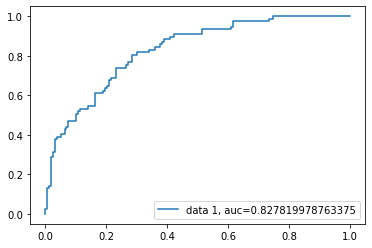

In [82]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Area Under Curve (AUC) is at 82.78% while using Age as factor variable
 - AUC has increased noticeably compared to 'Age-only' model
 - using age as factor variable together with other variables significantly outperformes logit model using age as quantitative variable
 - this confirms our thesis that Age as factor variable carries more value to the model than Age as quantitative variable

In [83]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.524622
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  708
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                            6
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.2139
Time:                        18:44:10   Log-Likelihood:                -371.43
converged:                       True   LL-Null:                       -472.51
Covariance Type:            nonrobust   LLR p-value:                 6.583e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0104      0.009      1.115      0.265      -0.008       0.029
x2             0.0001   4.19e

**According to wald test, loan term, Year of application, Gender and age are not sufficient predictor of the default**



# 3.Composing model out of significant variables

- in previous sections we tested which usage of Age is better for model performance (factor vs quantitative usage]
- we also attempted to create model using all available variables
- however information is expensive, which is why in this section we will attempt to create the equivalent model using as few variables as possible
- models will be evaluated based on AUC metric compared to the benchmark result in section 2.2 generated by model using all variable available (82.78%)

## 3.1. Identifying Significant Variables

Testing all factor variables for significance
- confirming that conclusions from previous section are accurate

In [84]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [85]:
import researchpy as rp

In [86]:
crosstab, test_results, expected = rp.crosstab(data['DEFAULT'], data['City'], test = "chi-square", expected_freqs = True, prop = "cell" )
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,22.0192
1,p-value =,0.0000
2,Cramer's phi =,0.1527


**City is significant factor**

In [87]:
crosstab, test_results, expected = rp.crosstab(data['DEFAULT'], data['Gender'], test = "chi-square", expected_freqs = True, prop = "cell" )
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.1687
1,p-value =,0.6812
2,Cramer's phi =,0.0134


**Gender is insignificant factor**

In [88]:
crosstab, test_results, expected = rp.crosstab(data['DEFAULT'], data['Education'], test = "chi-square", expected_freqs = True, prop = "cell" )
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,182.6513
1,p-value =,0.0000
2,Cramer's V =,0.4399


**Education is significant factor**

In [89]:
crosstab, test_results, expected = rp.crosstab(data['DEFAULT'], data['Risk_Age_Float'], test = "chi-square", expected_freqs = True, prop = "cell" )
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,29.560
1,p-value =,0.000
2,Cramer's phi =,0.177


Age as factor variable is significant factor

## [SELECTED VARIABLES] Significant Variables Model

In [90]:
feature_vars = ['Loan Amount', 'City_Float', 'Education_Float', 'Age']

y = data['DEFAULT']
x = data[feature_vars]
x = np.asmatrix(x)

y_train,y_test,x_train,x_test = train_test_split(y,x,test_size=0.25, random_state=0)
#x_train = x_train.values.reshape(-1,1)
#x_test = x_test.values.reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/Users/danielmalinovsky/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[127,  32],
       [ 27,  50]])

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


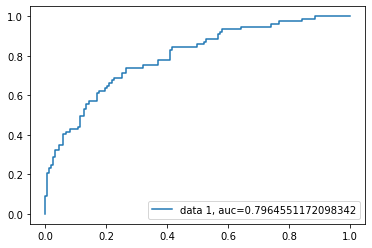

In [93]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Area Under Curve (AUC) is 0.8, which means given model is good. Presented Logistic Regression model is acceptable**
- interestingly enough this model already perfomrs only 0.2% worse than model using all variables and Age as quantitative variable, while restraining to only 4 variables used for prediction

In [94]:
GINI = (2*auc)-1
print(GINI)

0.5929102344196684


**GINI coeficient is above 0.55 which means give model is acceptable. 
Presented LogisticRegression model is acceptable**

In [95]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.565021
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  708
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            3
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.1534
Time:                        18:44:13   Log-Likelihood:                -400.03
converged:                       True   LL-Null:                       -472.51
Covariance Type:            nonrobust   LLR p-value:                 3.229e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002   3.18e-05      5.605      0.000       0.000       0.000
x2            -0.2190      0.

**According to wald test, City is not sufficient predictor of the default**
- interestingly enough, wald test is indicating that city is not relevant variable for given model, even though Chi-Squared test resulted in values supporting it's usage in logit model


## [SELECTED VARIABLES] Model without City factor variable
- due to result of the Wald test in previous section, we will attempt to construct a logit model without city as variable to see if models performance will increase
- performance will bea measure by AUC similar to the previous sections

In [96]:
feature_vars = ['Loan Amount', 'Education_Float', 'Risk_Age_Float']

y = data['DEFAULT']
x = data[feature_vars]
x = np.asmatrix(x)

y_train,y_test,x_train,x_test = train_test_split(y,x,test_size=0.25, random_state=0)
#x_train = x_train.values.reshape(-1,1)
#x_test = x_test.values.reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [97]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,  19],
       [ 40,  37]])

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


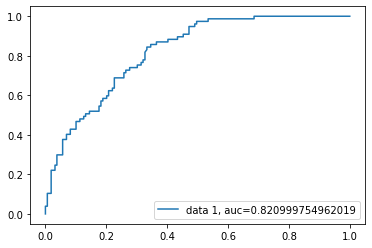

In [99]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Area Under Curve (AUC) is 0.8, which means given model is good. Presented Logistic Regression model is acceptable**
- AUC resulted in higher values than model with City as factor variable, which is supporting result of Wald test indicating that City should be removed from the logit model
- furthermore this logit model is just 0.007 lower score than model using all of the variables and Age as factor variable
- model composed of only 3 variables (Loan Amount, Highest Education Level and Risk Age as factor variable) is reaching roughly same accuracy as model with all of the variables

In [100]:
GINI = (2*auc)-1
print(GINI)

0.6419995099240381


**GINI coeficient is above 0.55 which means give model is acceptable. 
Presented LogisticRegression model is acceptable**

In [101]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.552386
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                  708
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:                  0.1723
Time:                        18:44:13   Log-Likelihood:                -391.09
converged:                       True   LL-Null:                       -472.51
Covariance Type:            nonrobust   LLR p-value:                 4.351e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002   3.02e-05      6.563      0.000       0.000       0.000
x2            -0.9145      0.

- wald test is no longer indicating any redundand variable
- thus we can conclude that ideal logit model will be using Age as factor variable, Loan Amount, Highest reached education

# 4.DEV: Random Forrest Model

## 4.1 Model with age as quantitative variable

In [102]:
#feature_vars = ['Loan term', 'Loan Amount', 'Year of application', 'City_Float', 'Gender_Float', 'Education_Float', 'Age']
print(data.head())
print(data.shape)
print(sorted(data_raw))

   Loan term  Loan Amount  Year of application  Year of birth    City  Gender  \
0         36       2384.0                 2012           1979  Prague  Female   
1         12       3499.0                 2015           1986    Brno  Female   
2          9        918.0                 2014           1984  Prague  Female   
3          9       1501.0                 2010           1976    Brno  Female   
4         12       1555.0                 2017           1962    Brno  Female   

   Education  DEFAULT  Age  Risk_Age_Float  City_Float  Gender_Float  \
0    Primary        1   41               0         1.0           2.0   
1    Primary        0   34               0         2.0           2.0   
2    Primary        1   36               0         1.0           2.0   
3    Primary        0   44               0         2.0           2.0   
4  Secondary        0   58               1         2.0           2.0   

   Education_Float  
0              1.0  
1              1.0  
2              1.

Rf model with all features (age as quantitative variable)

In [103]:
feature_vars = ['Loan term', 'Loan Amount', 'Year of application', 'City_Float', 'Gender_Float', 'Education_Float', 'Age']
X = data[feature_vars]
y = data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [104]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: "+str(round(metrics.accuracy_score(y_test, y_pred),3)))

Accuracy: 0.733


In [105]:
print(sorted(X))
feature_imp = pd.Series(clf.feature_importances_, index=sorted(X)).sort_values(ascending=False)
feature_imp

['Age', 'City_Float', 'Education_Float', 'Gender_Float', 'Loan Amount', 'Loan term', 'Year of application']


City_Float             0.244301
Year of application    0.233664
Loan term              0.189250
Age                    0.137226
Education_Float        0.128232
Gender_Float           0.038955
Loan Amount            0.028372
dtype: float64

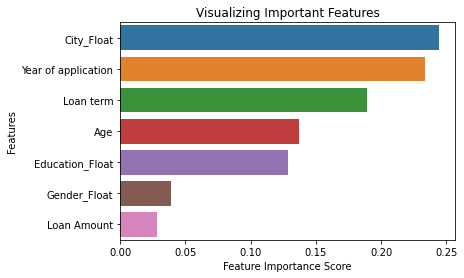

In [106]:
sns.barplot(y=feature_imp.index, x=feature_imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [107]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[124  23]
 [ 40  49]]


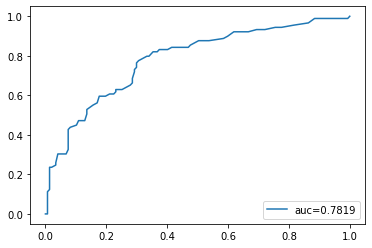

In [108]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.show()

Removing least important features

In [109]:
X_train = X_train.drop(columns=['Gender_Float','Loan term'])
X_test = X_test.drop(columns=['Gender_Float','Loan term'])

In [110]:
clf = RandomForestClassifier(n_estimators=100, random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: "+str(round(metrics.accuracy_score(y_test, y_pred),3)))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(sorted(X_train))
feature_imp = pd.Series(clf.feature_importances_, index=sorted(X_train)).sort_values(ascending=False)
feature_imp

Accuracy: 0.712
[[120  27]
 [ 41  48]]
['Age', 'City_Float', 'Education_Float', 'Loan Amount', 'Year of application']


Age                    0.336116
Year of application    0.281267
Loan Amount            0.198758
City_Float             0.144096
Education_Float        0.039764
dtype: float64

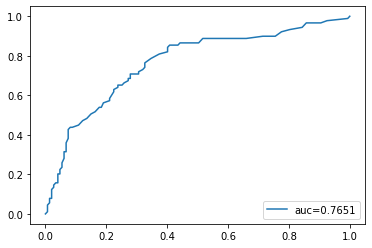

In [111]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.show()

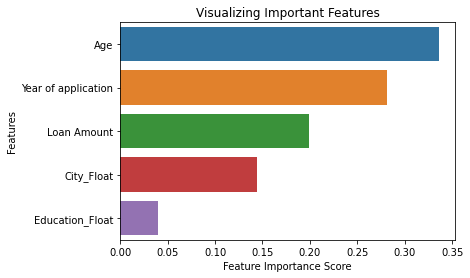

In [112]:
sns.barplot(y=feature_imp.index, x=feature_imp)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

Removing another least significant feature

In [113]:
X_train = X_train.drop(columns=['Education_Float'])
X_test = X_test.drop(columns=['Education_Float'])

In [114]:
clf = RandomForestClassifier(n_estimators=100, random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: "+str(round(metrics.accuracy_score(y_test, y_pred),3)))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(sorted(X_train))
feature_imp = pd.Series(clf.feature_importances_, index=sorted(X_train)).sort_values(ascending=False)
feature_imp

Accuracy: 0.72
[[128  19]
 [ 47  42]]
['Age', 'City_Float', 'Loan Amount', 'Year of application']


Age                    0.460786
Year of application    0.336408
City_Float             0.163458
Loan Amount            0.039349
dtype: float64

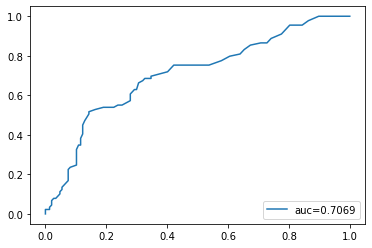

In [115]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.show()

We can see that removing the least important features decreases accuracy as well as auc, so in this case, 
keeping all features in the model appears as the best option. Since this model has been built using age as quantitative variable,
now we will compare it to model which uses age as 0/1 (as in logreg case - risk age group yes/no) variable

## 4.2 Model with age as factor variable

In [116]:
print(data.head())
print(data.shape)

   Loan term  Loan Amount  Year of application  Year of birth    City  Gender  \
0         36       2384.0                 2012           1979  Prague  Female   
1         12       3499.0                 2015           1986    Brno  Female   
2          9        918.0                 2014           1984  Prague  Female   
3          9       1501.0                 2010           1976    Brno  Female   
4         12       1555.0                 2017           1962    Brno  Female   

   Education  DEFAULT  Age  Risk_Age_Float  City_Float  Gender_Float  \
0    Primary        1   41               0         1.0           2.0   
1    Primary        0   34               0         2.0           2.0   
2    Primary        1   36               0         1.0           2.0   
3    Primary        0   44               0         2.0           2.0   
4  Secondary        0   58               1         2.0           2.0   

   Education_Float  
0              1.0  
1              1.0  
2              1.

In [117]:
feature_vars = ['Loan term', 'Loan Amount', 'Year of application', 'City_Float', 'Gender_Float', 'Education_Float', 'Risk_Age_Float']
X = data[feature_vars]
y = data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
clf = RandomForestClassifier(n_estimators=100, random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: "+str(round(metrics.accuracy_score(y_test, y_pred),3)))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Accuracy: 0.758
[[130  17]
 [ 40  49]]


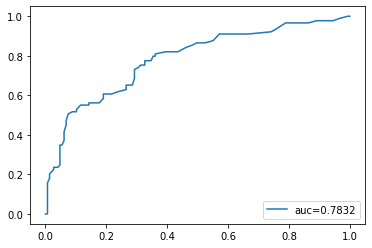

In [118]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.show()

In [119]:
# by running following code, it is possible to plot part of one of the trees, but we dont find it necessary or interesting
#plt.figure(figsize=[12,12])
#from sklearn.tree import plot_tree
#plot_tree(clf.estimators_[0], max_depth=2)

Perhaps quite surprisingly, even here the results were slightly better when using age as 0/1 (risk group yes/no) variable than when using it as „continuous" variable (accuracy around 2 percentage points and auc around 0,2 pct point higher), so next, we will try to get even better model by tuning its hyperparametrs.

## 4.3 Hyperparameter boosting

In [120]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [121]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 350, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 150, 250, 350]}


In [122]:
feature_vars = ['Loan term', 'Loan Amount', 'Year of application', 'City_Float', 'Gender_Float', 'Education_Float', 'Risk_Age_Float']
X = data[feature_vars]
y = data['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

Based on our experience, running time of following code (hyppar. tuning) is expected to be 61s.

In [123]:
clf = RandomForestClassifier(random_state = 1)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 150, 250, 350]},
                   random_state=42, verbose=2)

In [124]:
clf_random.best_params_

# result: {'n_estimators': 50,
# 'min_samples_split': 2,
# 'min_samples_leaf': 4,
# 'max_features': 'auto',
# 'max_depth': 40,
# 'bootstrap': True}

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [125]:
clf = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features='auto', max_depth=40, bootstrap=True, random_state = 1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: "+str(round(metrics.accuracy_score(y_test, y_pred),4)))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Accuracy: 0.7627
[[130  17]
 [ 39  50]]


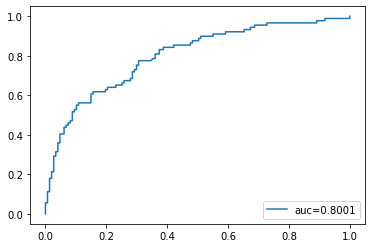

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=350; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=350; total time=   1.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=350; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=250; total time=   0.7s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=350; total time=   1.2s
[CV] END bootstrap=True, max_depth=40

[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=350; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=20

[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=350; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=250; total time=   0.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=350; total time=   1.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=350; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, 

In [126]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(round(auc,4)))
plt.legend(loc=4)
plt.show()

By tuning hyperparameters, we improved previous best models accuracy about 1 pct point to 0,76 and auc about 2 pct points to 0,8, so the results are now very similar to logistic regression model.